# Actor-Critic

In [1]:
from collections import defaultdict
import gym
import numpy as np
import matplotlib.pyplot as plt
from frozen_lake_util import show_q_value

確率的方策として、softmax関数を考える

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

class Actor():
    def __init__(self, n_states, n_actions):
        self.actions = list(range(n_actions))
        self.theta = np.random.uniform(0, 1, (n_states, n_actions))
    
    def policy(self, state):
        a = np.random.choice(self.actions, p=softmax(self.theta[s]))
        return a

In [3]:
class Critic():
    def __init__(self, n_states, n_actions):
        self.V = np.zeros(n_states)
        self.Q = defaultdict(lambda: [0] * n_actions)

In [4]:
# パラメーター
n_episode = 40000 # 何回エピソードを回すか
gamma = 0.9     # 割引率 
lr_a = 0.14 # actorの学習率
lr_c = 0.1 # criticの学習率
render = False # 描画するか

env = gym.make('FrozenLakeEasy-v0')
n_actions = env.action_space.n
n_states = env.observation_space.n

# ActorとCriticの初期化
actor = Actor(n_states, n_actions)
critic = Critic(n_states, n_actions)


In [5]:
l = []
for e in range(n_episode):
    s = env.reset() # 初期化
    a = actor.policy(s)
    done = False
    while not done:
        if render:
            env.render() # 描画

        n_s, reward, done, _ = env.step(a) # envにactionを渡して状態遷移
        n_a = actor.policy(n_s) # 次の状態における、行動を決定
        # actorの勾配, log softmaxの微分*Q(s, a)
        grad = (1 - softmax(actor.theta[s])[a]) * critic.Q[s][a] # A(s, a) = Q(s, a) - V(s)を使う場合もある
        # actorの係数を更新
        actor.theta[s][a] += lr_a * grad
        # Qを更新
        td_error = reward + gamma * critic.Q[n_s][n_a] - critic.Q[s][a] 
        critic.Q[s][a] += lr_c * td_error
        # 状態と行動を更新
        s = n_s
        a = n_a

    l.append(reward)

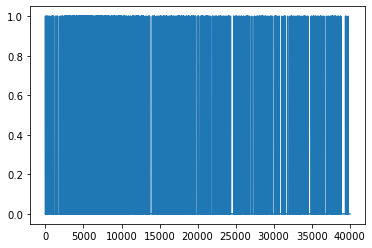

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(l)

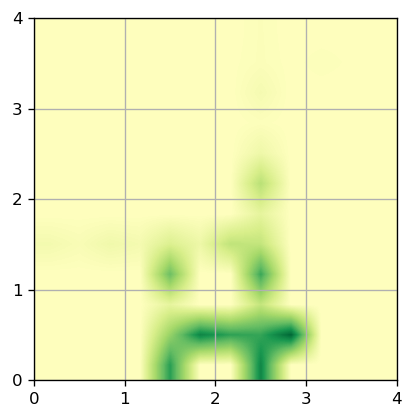

In [7]:
show_q_value(critic.Q)